In [1]:
import numpy as np

In [2]:
XOR_X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

XOR_Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [3]:
# Impor `Sequential` dari` keras.models`
from keras.models import Sequential

# Impor `Dense` dari` keras.layers`
from keras.layers import Dense

# Inisialisasi konstruktor
model = Sequential()

# Tambahkan lapisan masukan
model.add(Dense(2, activation='sigmoid', input_shape=(2,)))

# Tambahkan satu lapisan tersembunyi
model.add(Dense(2, activation='sigmoid'))

# Tambahkan lapisan keluaran
model.add(Dense(1, activation='sigmoid'))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Bentuk keluaran model
model.output_shape

# Ringkasan model
model.summary()

# Konfigurasi model
model.get_config()

# Buat daftar semua tensor bobot
model.get_weights()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

[array([[0.01785588, 0.40839887],
        [1.0544196 , 0.01290965]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.1291852 , -0.508804  ],
        [ 0.15441263, -0.9138621 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.45732838],
        [-0.901163  ]], dtype=float32),
 array([0.], dtype=float32)]

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(XOR_X, XOR_Y,epochs=1000, batch_size=1, verbose=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5667 - loss: 0.6903
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.6062 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5667 - loss: 0.6895 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5667 - loss: 0.6890 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5667 - loss: 0.6891 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2667 - loss: 0.8453     
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2667 - loss: 0.8450      
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4333 - loss: 0.7575      
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2667 - loss: 0.8426      
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3667 - loss: 0.7895      
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4333 - loss: 0.7574      
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━

In [6]:
Hasil_Prediksi_Keras = model.predict(XOR_X)
print(Hasil_Prediksi_Keras)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[0.48688436]
 [0.5002428 ]
 [0.49987713]
 [0.50632155]]


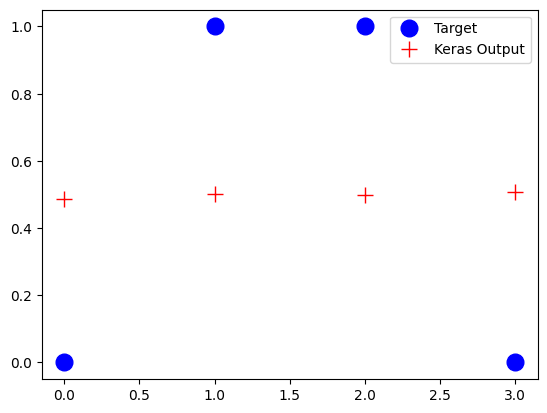

In [7]:
import matplotlib.pyplot as plt
plt.plot(XOR_Y, 'bo', label='Target', linewidth=2, markersize=12)
plt.plot(Hasil_Prediksi_Keras, 'r+', label='Keras Output', linewidth=2, markersize=12)
plt.legend(loc='upper right')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse2  = mean_squared_error(XOR_Y, Hasil_Prediksi_Keras)
rmse2 = sqrt(mean_squared_error(XOR_Y, Hasil_Prediksi_Keras))
print('MSE =',mse2)
print('RMSE =',rmse2)   

MSE = 0.248324501698461
RMSE = 0.4983216849570777
